<a href="https://colab.research.google.com/github/Yogesh-dahake08/CODSOFT_INTERNSHIP/blob/main/TASK_2_Movie_Rating_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CODSOFT INTERNSHIP**

TASK 2: Movie Rating Prediction

AUTHOR: Yogesh Dahake

DOMAIN : Data Science

## PROJECT INTRODUCTION
This set is pulled from IMDb.com of all the Indian movies on the platform. It consists of columns like Genre, voting, release year, actor names, director, ratings and others. I Clean this data by removing missing values or adding average values. This process helped me  to manipulate the data to help with my EDA.



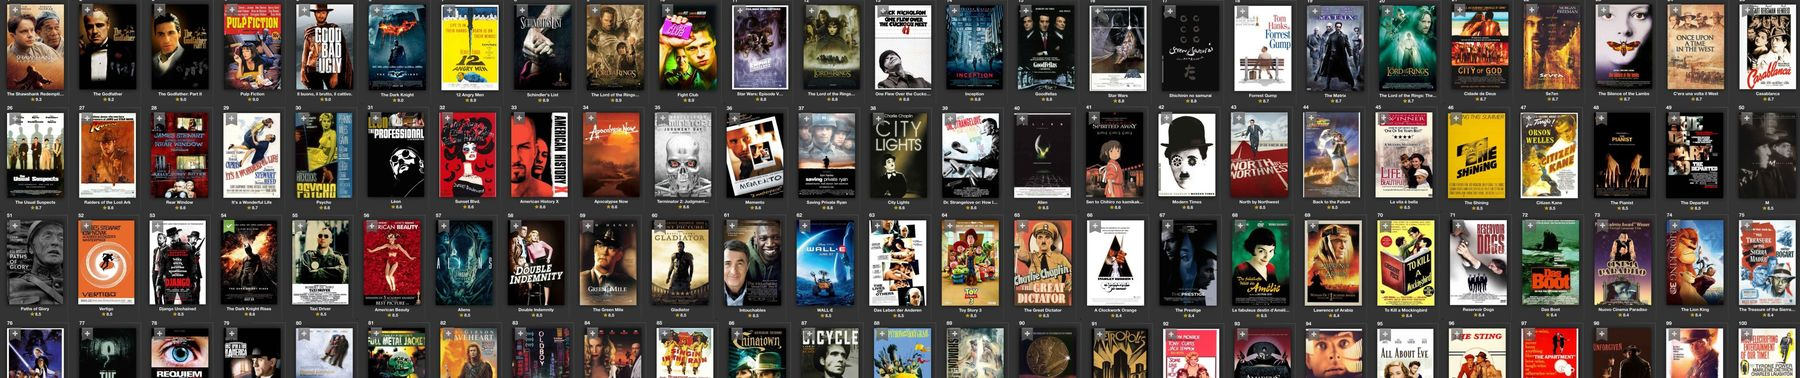

## PROBLEM STATEMENT
* Build a model that predicts the rating of a movie based on
features like genre, director, and actors.
* The goal is to analyze movie data and develop a model
that accurately estimates the rating given to a movie by users or
critics.

## ADDRESSING THE PROBLEM
* I  will be cleaning the dataset and remove all the duplicates value if any.
* I will drop the irrelevant columns which would not effect in predicting the rating.
* As this is a large dataset if the nan values be removed still it will contain enough data to analyze the patterns.
* Here I intend to use artifician neural networks (ANN) to prepare the model

## GETTING STARTED

### IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### IMPORTING DATASET

In [2]:
dataset = pd.read_csv("/content/sample_data/IMDb Movies India.csv", encoding='ISO-8859-1')

In [3]:
dataset.shape

(15509, 10)

### DATA CLEANING AND DATA HANDLING

In [7]:
dataset.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [8]:
dataset["Rating"] = dataset.pop("Rating")

In [9]:
dataset.head()

,Name,Year,Duration,Genre,Votes,Director,Actor 1,Actor 2,Actor 3,Rating
0,,NaN,NaN,Drama,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia,NaN
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,7.0
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,NaN
3,#Yaaram,(2019),110 min,"Comedy, Romance",35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,4.4
4,...And Once Again,(2010),105 min,Drama,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali,NaN


In [10]:
dataset.shape

(15509, 10)

In [11]:
dataset.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
Rating      7590
dtype: int64

In [12]:
dataset = dataset.dropna()

In [13]:
dataset.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
Rating      0
dtype: int64

In [14]:
dataset.shape

(5659, 10)

In [15]:
dataset = dataset.drop_duplicates()

In [16]:
dataset.duplicated().sum()

0

In [17]:
dataset = dataset.drop(["Name"], axis=1)

In [18]:
dataset.isnull().sum()

Year        0
Duration    0
Genre       0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
Rating      0
dtype: int64

In [19]:
dataset.shape

(5659, 9)

###PREPARING THE VALUES TO FLOAT

In [20]:
dataset["Duration"] = dataset["Duration"].astype(str).str.extract('(\d+)').astype(float)
dataset['Year'] = dataset['Year'].str.extract('(\d+)').astype(float)
dataset['Votes'] = dataset['Votes'].str.replace(',', '').astype(float)

In [21]:
dataset.head()

,Year,Duration,Genre,Votes,Director,Actor 1,Actor 2,Actor 3,Rating
1,2019.0,109.0,Drama,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,7.0
3,2019.0,110.0,"Comedy, Romance",35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,4.4
5,1997.0,147.0,"Comedy, Drama, Musical",827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,4.7
6,2005.0,142.0,"Drama, Romance, War",1086.0,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,7.4
8,2012.0,82.0,"Horror, Mystery, Thriller",326.0,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,5.6


### SPLITTING THE DATASET INTO FEATURES AND TARGET COLUMN

In [22]:
x = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1].values

In [23]:
x.shape

(5659, 8)

In [24]:
y.shape

(5659,)

In [25]:
print(x)

         Year  Duration                      Genre   Votes         Director  \
1      2019.0     109.0                      Drama     8.0    Gaurav Bakshi   
3      2019.0     110.0            Comedy, Romance    35.0       Ovais Khan   
5      1997.0     147.0     Comedy, Drama, Musical   827.0     Rahul Rawail   
6      2005.0     142.0        Drama, Romance, War  1086.0   Shoojit Sircar   
8      2012.0      82.0  Horror, Mystery, Thriller   326.0    Allyson Patel   
...       ...       ...                        ...     ...              ...   
15493  2015.0     115.0                      Drama   408.0      Mozez Singh   
15494  2001.0     153.0  Biography, Drama, History  1496.0    Shyam Benegal   
15503  1989.0     125.0       Action, Crime, Drama    44.0  S.P. Muthuraman   
15505  1999.0     129.0              Action, Drama   655.0       Kuku Kohli   
15508  1998.0     130.0              Action, Drama    20.0     K.C. Bokadia   

               Actor 1                 Actor 2     

### TRANSFORMING CATEGORICAL VALUES INTO NUMERICAL VALUES

In [26]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('Genre_encoder', OneHotEncoder(sparse_output=False), [2]),
('director encoder', OneHotEncoder(sparse_output=False), [4]),
('Actor1_encoder', OneHotEncoder(sparse_output=False), [5]),
  ('Actor_2 encoder', OneHotEncoder(sparse_output= False), [6]),
  ('Actor_3 encoder', OneHotEncoder(sparse_output= False), [7])],
    remainder='passthrough')

x = np.array(ct.fit_transform(x))

In [27]:
print(x)

[[   0.    0.    0. ... 2019.  109.    8.]
 [   0.    0.    0. ... 2019.  110.   35.]
 [   0.    0.    0. ... 1997.  147.  827.]
 ...
 [   0.    0.    0. ... 1989.  125.   44.]
 [   0.    0.    0. ... 1999.  129.  655.]
 [   0.    0.    0. ... 1998.  130.   20.]]


In [28]:
x.shape

(5659, 9647)

###SPLITTING THE DATASET INTO TRAINING SET AND TEST SET

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.01, random_state = 0)

###FEATURE SCALING OF INDEPENDENT VARIABLES

In [30]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

### CREATING AND FITTING THE MODEL

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [32]:
model = Sequential()

#model.add(Dense(units= 100, activation= 'relu'))
model.add(Dense(units= 300, activation= 'relu'))
model.add(Dense(units= 200, activation= 'relu'))
model.add(Dense(units= 100, activation= 'relu'))
model.add(Dense(units= 150, activation= 'relu'))
model.add(Dense(units= 100, activation= 'relu'))
model.add(Dense(units= 50, activation= 'relu'))

model.add(Dense(units= 1, activation= 'linear'))

In [33]:
model.compile(optimizer= 'adam', loss= 'mean_squared_error')

In [34]:
model.fit(x_train, y_train, batch_size = 10, epochs= 30)

Epoch 1/30
561/561 [==============================] - 27s 45ms/step - loss: 2.8317
Epoch 2/30
561/561 [==============================] - 42s 74ms/step - loss: 0.8785
Epoch 3/30
561/561 [==============================] - 26s 47ms/step - loss: 0.4627
Epoch 4/30
561/561 [==============================] - 25s 45ms/step - loss: 0.3000
Epoch 5/30
561/561 [==============================] - 25s 44ms/step - loss: 0.2217
Epoch 6/30
561/561 [==============================] - 27s 48ms/step - loss: 0.1635
Epoch 7/30
561/561 [==============================] - 20s 35ms/step - loss: 0.1385
Epoch 8/30
561/561 [==============================] - 22s 39ms/step - loss: 0.1220
Epoch 9/30
561/561 [==============================] - 25s 44ms/step - loss: 0.1112
Epoch 10/30
561/561 [==============================] - 23s 41ms/step - loss: 0.0952
Epoch 11/30
561/561 [==============================] - 21s 38ms/step - loss: 0.0895
Epoch 12/30
561/561 [==============================] - 28s 50ms/step - loss: 0.0794
E

<function matplotlib.pyplot.show(close=None, block=None)>

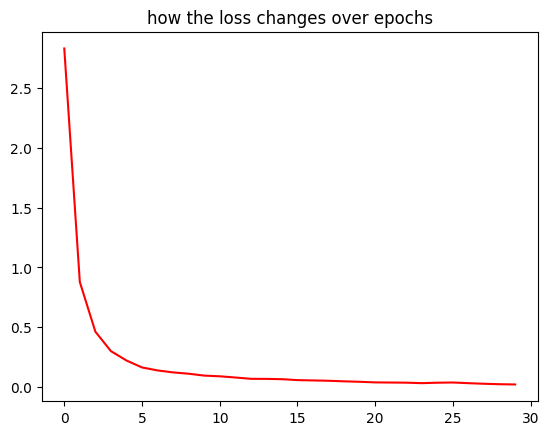

In [35]:
loss_data = pd.DataFrame(model.history.history,)
plt.plot(loss_data, c= 'red')
plt.title("how the loss changes over epochs")
plt.show

###  COMPARING ORIGINAL RATING & PREDICTED RATING

In [36]:
y_pred = model.predict(x_test)
y_pred = pd.DataFrame(y_pred.reshape(len(y_test),1))
y_test = pd.DataFrame(y_test.reshape(len(y_test),1))
df = pd.concat((y_test, y_pred),axis=1)
df.columns = ['true value','predicted value']

2/2 [==============================] - 0s 11ms/step


In [37]:
df

,true value,predicted value
0,6.6,6.340193
1,5.9,6.017976
2,4.7,5.305099
3,6.2,5.098072
4,4.5,5.407745
5,6.1,10.639510
6,4.2,5.566482
7,3.6,4.271699
8,5.2,7.161593
9,5.7,5.870398


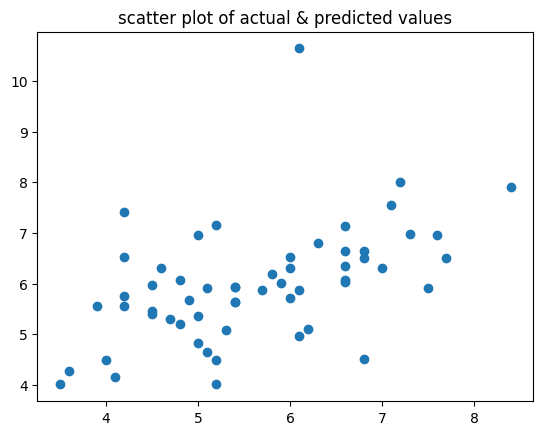

In [38]:
plt.scatter(y_test, y_pred)
plt.title("scatter plot of actual & predicted values")
plt.show()

Text(0.5, 1.0, 'true vs predicted ratings for different movies')

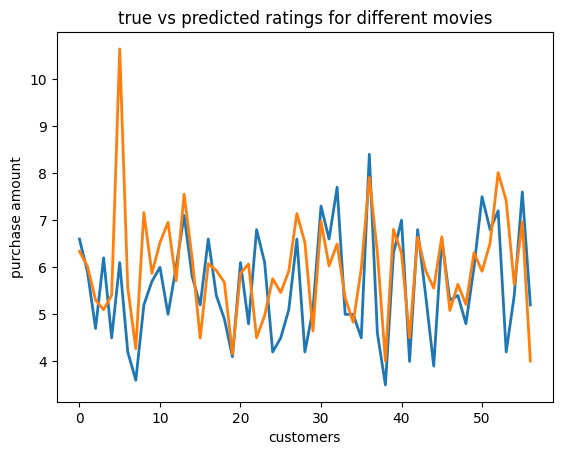

In [39]:
plt.xlabel('customers')
plt.ylabel('purchase amount')
plt.plot(y_test, linewidth= 2) #blue lines
plt.plot(y_pred,linewidth= 2) #orange lines
plt.title('true vs predicted ratings for different movies')

### CHECKING THE ACCURACY AND PERFORMANCE OF THE MODEL

In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Mean Absolute Error:".ljust(25),round(mean_absolute_error(y_test, y_pred),3))
print("mean absolute percentage error:".ljust(32),round(mean_absolute_percentage_error(y_test, y_pred),2))
print("Root Mean Squared Error:".ljust(25), np.round(np.sqrt(mean_squared_error(y_test, y_pred)),3))

Mean Absolute Error:      0.869
mean absolute percentage error:  0.17
Root Mean Squared Error:  1.193


In [41]:
dataset['Rating'].describe()

count    5659.000000
mean        5.898533
std         1.381165
min         1.100000
25%         5.000000
50%         6.100000
75%         6.900000
max        10.000000
Name: Rating, dtype: float64